# Developing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reservoir_simulator import ReservoirSim 
from oldrs import ReservoirSim as ORS
import numpy as np
from scipy import stats
import scipy as sp


%load_ext autoreload
%autoreload 2   
%load_ext line_profiler

# Random number generator
rng = np.random.default_rng()

In [2]:
nx = ny = 100
perm_field = np.ones(ny * ny) * 100  # Replace with your actual perm field
reservoir = ReservoirSim(nx=nx, ny=ny, perm_field=perm_field)
pressure_history = reservoir.simulate()
np.allclose(ORS(nx=nx, ny=ny, perm_field=perm_field).simulate(), pressure_history[1:, :])

True

In [3]:
%timeit reservoir.simulate()

429 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%lprun -f ReservoirSim.simulate reservoir.simulate()

Timer unit: 1e-09 s

Total time: 0.537036 s
File: /home/dtr/Codes/DA-EM-CCS/notebooks/reservoir_simulator.py
Function: simulate at line 107

Line #      Hits         Time  Per Hit   % Time  Line Contents
   107                                               def simulate(self, realizations=10, dt=0.0001):
   108                                           
   109         1     116304.0 116304.0      0.0          compr = self.volumes * self.phi * self.c_f / dt
   110                                           
   111         1       3139.0   3139.0      0.0          P = np.empty((realizations+1, self.nb))
   112         1      34869.0  34869.0      0.0          P[0, :] = np.ones(self.nb) * self.pres_ini
   113                                           
   114        10       4348.0    434.8      0.0          for i in range(realizations):
   115                                           
   116        10     336381.0  33638.1      0.1              dens = self.rho0 * (1 + self.c_f * (P[i, :] -

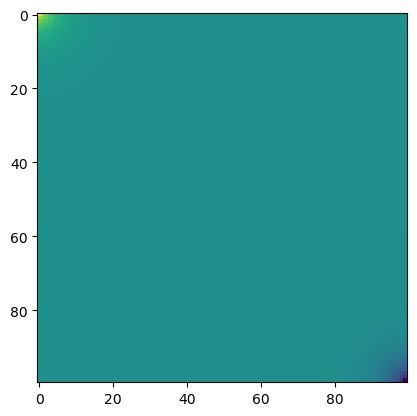

In [5]:
pressure_history = pressure_history.reshape((pressure_history.shape[0], nx,ny))
plt.imshow(pressure_history[-1,:,:])

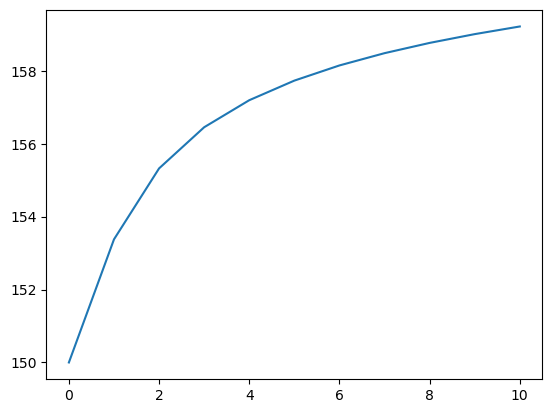

In [6]:
plt.plot(pressure_history[:,1,1])